In [ ]:
# Getting Python ready
from scipy.stats import norm
from scipy.special import comb
import matplotlib.pyplot as plt
import numpy as np
#from ipynb.fs.full.Bernoulli import aBernoulliExperiment
import math
import textwrap
import ipynb.fs.defs.Bernoulli as bern


We will now create the procedure for an experiment whose outcomes are modeled by a Binomial RV. The function is

    aBinomialExperiment(randomNumGen, binomialParam_n=5, binomialParam_p=0.5)

As we would expect, the experiment involves binomialParam_n sub-experiments, where each sub-experiment's outcome is modeled by a Bernoulli(binomialParam_p) RV. The outcomes of the binomialParam_n Bernoulli RVs are independent.

The outcomes modeled by the Binomial RV are the number of trials that resulted in a 1.

In [ ]:
def aBinomialExperiment(randomNumGen, binomialParam_n=5, binomialParam_p=0.5, profitLoss_Bern = [1,0]):
    
    outcomesOfBernTrails = bern.aBernoulliExperiment(randomNumGen, bernoulliParam_p=binomialParam_p, numRepeatsOfExp = 1, numTrialsInAnExp = binomialParam_n, profitLoss = profitLoss_Bern)

    #print(outcomesOfBernTrails)

    outcomeOfBinomialExp = np.sum(outcomesOfBernTrails)

    #print(outcomeOfBinomialExp)

    return outcomeOfBinomialExp

The Quincunx machine (Galton Board) https://www.mathsisfun.com/data/quincunx.html

A ball hits a peg and falls to its left or to its right to reach a lower level row of pegs. It hits another peg in the lower level row and the process continues. Eventually the balls hits a peg in the last row and is collected in a bin either to the left or the right of the peg.

The animation shows how balls collect in the bins. The animation simulates a Binomial RV. How?


The Quincunx machine (Galton Board) https://www.mathsisfun.com/data/quincunx.html


A ball hitting a peg results in a Bernoulli(0.5) outcome (ball goes either left or right (loss/ win, failure/ success) with equal probability, where the Bernoulli RV maps left to 0 and maps right to 1). In the visualization, "Size" is the number of trials that constitute an experiment. Each bin corresponds to the number of pegs that deflected a ball to the right.

We perform one experiment and record the outcome, which is the number of trials that resulted in a 1.

In [ ]:
v_binomial_n = 5
v_binomial_p = 0.5

outcomeOfBinomialExp = aBinomialExperiment(np.random.default_rng(78918), v_binomial_n, v_binomial_p, [1,0])#, [-10,10])

print(outcomeOfBinomialExp)

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False)
#histVal = ax1.hist(outcomeOfBinomialExp + 1, bins=range(0,v_binomial_n+1), density=True, align='left')

histVal = np.histogram(outcomeOfBinomialExp, bins=range(0,v_binomial_n+2), density=False)#, rwidth=1)

print("The histogram values are:", histVal)

ax[0].bar(histVal[1][0:-1]/v_binomial_n, histVal[0]/numberOfBinomialExps, width = 0.01)
# ax1.set_xscale("linear")
ax[0].set_xlabel("Number of successes as a fraction of total trials (Binomial Experiment)")
ax[0].set_ylabel(textwrap.fill("Frequency of Number of Successes", 10))

ax[1].bar(histVal[1][0:-1], histVal[0]/numberOfBinomialExps, width = .05)
# ax1.set_xscale("linear")
ax[1].set_xlabel("Number of successes (Binomial Experiment)")
ax[1].set_ylabel(textwrap.fill("Frequency of Number of Successes", 10))

plt.tight_layout(h_pad = 5.0)

We perform many experiments and record the outcome for each experiment. Specifically, we record the number of trials that resulted in a 1 in the experiment. Note that each experiment's outcome is governed by the same Binomial RV. As we increase the number of experiments, the histogram of the outcomes of the experiments begins to look more and more like the PMF of the Binomial(n,p) RV.

If we increase n, we see that the outcomes concentrate more and more around the mean in the histogram. The spread around the mean reduces as we increase n.

In [243]:
numberOfBinomialExps = 1000

v_binomial_n = 5
v_binomial_p = 0.5

rng = np.random.default_rng(7381638)

outcomeOfBinomialExps = np.ndarray((numberOfBinomialExps,1))

for i in range(numberOfBinomialExps):
    outcomeOfBinomialExps[i,:] = aBinomialExperiment(rng, v_binomial_n, v_binomial_p, [1,0])

The histogram[1] values are: [0 1 2 3 4 5 6]
The histogram[0] values are: [ 39 163 313 275 176  34]


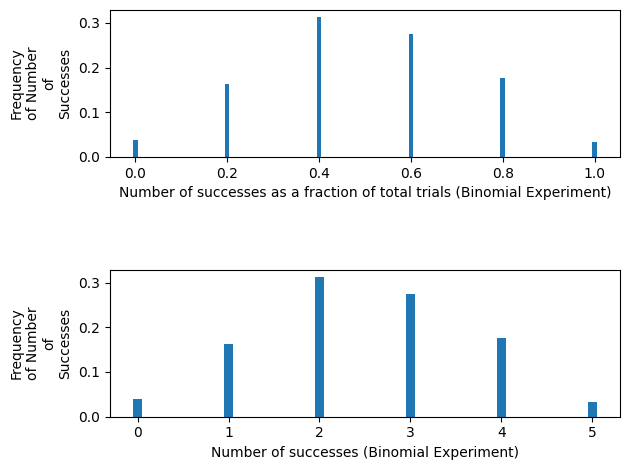

In [244]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False)

#histVal = np.histogram(outcomeOfBinomialExps, bins=range(0,v_binomial_n+1), density=True)

histVal = np.histogram(outcomeOfBinomialExps, bins=range(0,v_binomial_n+2), density=False)

#histVal = ax1.hist(outcomeOfBinomialExps, bins=range(0,v_binomial_n+1), density=True, align='left')
# print("The histogram values are:", histhistVal[0].sizeVal[1])
# print("The histogram values are:", histVal[0])
# print(histVal[0].size)


#histVal[0].resize(histVal[1].shape)

# print(histVal[0])
# print(histVal[0][0:histVal[0].size])

#histVal[0][1:histVal[0].size] = histVal[0][0:histVal[0].size - 1]

print("The histogram[1] values are:", histVal[1])
print("The histogram[0] values are:", histVal[0])

# print(histVal[0])
# print(histVal[0].size)

ax[0].bar(histVal[1][0:-1]/v_binomial_n, histVal[0]/numberOfBinomialExps, width = 0.01)
# ax1.set_xscale("linear")
ax[0].set_xlabel("Number of successes as a fraction of total trials (Binomial Experiment)")
ax[0].set_ylabel(textwrap.fill("Frequency of Number of Successes", 10))

ax[1].bar(histVal[1][0:-1], histVal[0]/numberOfBinomialExps, width = 0.1)
# ax1.set_xscale("linear")
ax[1].set_xlabel("Number of successes (Binomial Experiment)")
ax[1].set_ylabel(textwrap.fill("Frequency of Number of Successes", 10))

plt.tight_layout(h_pad = 5.0)

In [305]:
frequentists = []

numberOfBinomialExps = 10000

v_binomial_n = [5, 10, 100, 1000]
v_binomial_p = 0.5

rng = np.random.default_rng(7381638)



for j in range(4):
    outcomeOfBinomialExps = np.ndarray((numberOfBinomialExps,1))
    for i in range(numberOfBinomialExps):
        outcomeOfBinomialExps[i,:] = aBinomialExperiment(rng, v_binomial_n[j], v_binomial_p, [1,0])

    # print("The outcomes are", outcomeOfBinomialExps)
    frequentists.append(outcomeOfBinomialExps)
    # print("The outcomes are", frequentists[j])


# for j in range(4):
#     print("The outcomes are", frequentists[j])

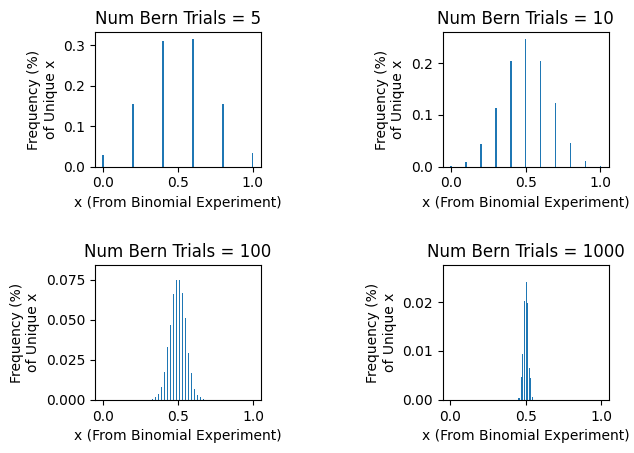

In [311]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False)

# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

plt.tight_layout(pad = 3.0, w_pad=10.0,h_pad=5.0)

# fig.set_label("No of Trials of Bern Exp is " + str(v_numTrialsInAnExp))
obsIdx = 0
widthArr = [0.01, 0.01, 0.005, 0.0006]
#for rowidx in range(int(np.ceil(v_numRepeats/2))):
for rowidx in range(2):
    for colidx in range(2):
        # print("The outcomes are", frequentists[obsIdx], "obsIdx:", obsIdx)
        histVal = np.histogram(frequentists[obsIdx], bins=range(0,v_binomial_n[obsIdx]+2), density=False)
        # print("The histogram[1] values are:", histVal[1])
        # print("The histogram[0] values are:", histVal[0])

        ax[rowidx][colidx].bar(histVal[1][0:-1]/v_binomial_n[obsIdx], histVal[0]/numberOfBinomialExps, width = widthArr[obsIdx])
        ax[rowidx][colidx].set_xscale("linear")
        ax[rowidx][colidx].set_xlabel("x (From Binomial Experiment)")
        ax[rowidx][colidx].set_ylabel(textwrap.fill("Frequency (%) of Unique x", width = 15))
        ax[rowidx][colidx].set_title("Num Bern Trials = " + str(v_binomial_n[obsIdx]))
        obsIdx = obsIdx + 1

# plt.subplot_tool()
# plt.show(block=True)


In [ ]:
numberOfBinomialExps = 1000

v_binomial_n = 100
v_binomial_p = 0.5

rng = np.random.default_rng(7381638)

outcomeOfBinomialExps = np.ndarray((numberOfBinomialExps,1))

for i in range(numberOfBinomialExps):
    outcomeOfBinomialExps[i,:] = aBinomialExperiment(rng, v_binomial_n, v_binomial_p, [1,0])

#print(outcomeOfBinomialExps[:,:])
#print(outcomeOfBinomialExps[:,:]/v_binomial_n)

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False)

#histVal = np.histogram(outcomeOfBinomialExps, bins=range(0,v_binomial_n+1), density=True)

histVal = np.histogram(outcomeOfBinomialExps, bins=range(0,v_binomial_n+2), density=False)

#histVal = ax1.hist(outcomeOfBinomialExps, bins=range(0,v_binomial_n+1), density=True, align='left')
# print("The histogram values are:", histhistVal[0].sizeVal[1])
# print("The histogram values are:", histVal[0])
# print(histVal[0].size)

print("The histogram[1] values are:", histVal[1])
print("The histogram[0] values are:", histVal[0])

#print("nchoosek(n,n/2) is:", 0.5**(v_binomial_n/2) * comb(v_binomial_n, v_binomial_n/2, exact=True))

#histVal[0].resize(histVal[1].shape)

# print(histVal[0])
# print(histVal[0][0:histVal[0].size])

#histVal[0][1:histVal[0].size] = histVal[0][0:histVal[0].size - 1]

#print("The histogram[1] values are:", histVal[1])
#print("The histogram[0] values are:", histVal[0])

# print(histVal[0])
# print(histVal[0].size)

ax[0].bar(histVal[1][0:-1]/v_binomial_n, histVal[0]/numberOfBinomialExps, width = 0.01)
# ax1.set_xscale("linear")
ax[0].set_xlabel("Number of successes as a fraction of total trials (Binomial Experiment)")
ax[0].set_ylabel(textwrap.fill("Frequency of Number of Successes", 10))

ax[1].bar(histVal[1][0:-1], histVal[0]/numberOfBinomialExps, width = 1)
# ax1.set_xscale("linear")
ax[1].set_xlabel("Number of successes (Binomial Experiment)")
ax[1].set_ylabel(textwrap.fill("Frequency of Number of Successes", 10))

plt.tight_layout(h_pad = 5.0)

Let's repeat the above, but for a much larger n.

In [ ]:
numberOfBinomialExps = 100000

v_binomial_n = 10000
v_binomial_p = 0.5

rng = np.random.default_rng(7381638)

outcomeOfBinomialExps = np.ndarray((numberOfBinomialExps,1))

for i in range(numberOfBinomialExps):
    outcomeOfBinomialExps[i,:] = aBinomialExperiment(rng, v_binomial_n, v_binomial_p, [1,0])

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False)

#histVal = np.histogram(outcomeOfBinomialExps, bins=range(0,v_binomial_n+1), density=True)

histVal = np.histogram(outcomeOfBinomialExps, bins=range(0,v_binomial_n+2), density=False)

#histVal = ax1.hist(outcomeOfBinomialExps, bins=range(0,v_binomial_n+1), density=True, align='left')
# print("The histogram values are:", histhistVal[0].sizeVal[1])
# print("The histogram values are:", histVal[0])
# print(histVal[0].size)


#histVal[0].resize(histVal[1].shape)

# print(histVal[0])
# print(histVal[0][0:histVal[0].size])

#histVal[0][1:histVal[0].size] = histVal[0][0:histVal[0].size - 1]

print("The histogram[1] values are:", histVal[1])
print("The histogram[0] values are:", histVal[0])

# print(histVal[0])
# print(histVal[0].size)

ax[0].bar(histVal[1][0:-1]/v_binomial_n, histVal[0]/numberOfBinomialExps, width = 0.0005)
# ax1.set_xscale("linear")
ax[0].set_xlabel("Number of successes as a fraction of total trials (Binomial Experiment)")
ax[0].set_ylabel(textwrap.fill("Frequency of Number of Successes", 10))

ax[1].bar(histVal[1][0:-1], histVal[0]/numberOfBinomialExps, width = 3)
# ax1.set_xscale("linear")
ax[1].set_xlabel("Number of successes (Binomial Experiment)")
ax[1].set_ylabel(textwrap.fill("Frequency of Number of Successes", 10))

plt.tight_layout(h_pad = 5.0)

Suppose we map our Bernoulli outcomes to the set {-10,10}. Specifically, we map 0 to -10 and 1 to 10. You may think of each Bernoulli trial as a gamble in a casino that results in a profit of 10 Rupees with probability p and a loss of -10 Rupees otherwise. We will simulate the distribution of the total profit at the end of playing n gambles. The numberOfBinomialExps below may be though of as the number of gamblers.

We will also do the above for when each gamble results in a profit of 1 or a loss of -1.

In [ ]:
numberOfBinomialExps = [100, 100]

v_binomial_n = [100000, 1000000]
v_binomial_p = 0.5
sizeofbet = [10, 1]

rng = np.random.default_rng(7381638)

print(numberOfBinomialExps[0])

outcomeOfBinomialExps_largeBet = np.ndarray((numberOfBinomialExps[0],1))

for i in range(numberOfBinomialExps[0]):
    outcomeOfBinomialExps_largeBet[i,:] = aBinomialExperiment(rng, v_binomial_n[0], v_binomial_p, [sizeofbet[0],-1 * sizeofbet[0]])

outcomeOfBinomialExps_smallBet = np.ndarray((numberOfBinomialExps[1],1))

for i in range(numberOfBinomialExps[1]):
    outcomeOfBinomialExps_smallBet[i,:] = aBinomialExperiment(rng, v_binomial_n[1], v_binomial_p, [sizeofbet[1],-1 * sizeofbet[1]])



#print(outcomeOfBinomialExps[:,:])
#print(outcomeOfBinomialExps[:,:]/v_binomial_n)

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False)

#histVal = np.histogram(outcomeOfBinomialExps, bins=range(0,v_binomial_n+1), density=True)

histVal = np.histogram(outcomeOfBinomialExps_largeBet, density=False)

#histVal = ax1.hist(outcomeOfBinomialExps, bins=range(0,v_binomial_n+1), density=True, align='left')
# print("The histogram values are:", histhistVal[0].sizeVal[1])
# print("The histogram values are:", histVal[0])
# print(histVal[0].size)


#histVal[0].resize(histVal[1].shape)

# print(histVal[0])
# print(histVal[0][0:histVal[0].size])

#histVal[0][1:histVal[0].size] = histVal[0][0:histVal[0].size - 1]

print("LARGE BETS:")
print("The histogram[1] values are:", histVal[1])
print("The histogram[0] values are:", histVal[0])
print("E[X]**2", (v_binomial_p * sizeofbet[0] + (1 - v_binomial_p) * -sizeofbet[0])**2)
print("STDDEV", np.sqrt(v_binomial_n[0] * (v_binomial_p * sizeofbet[0]**2 + (1 - v_binomial_p) * (-sizeofbet[0])**2 - (v_binomial_p * sizeofbet[0] + (1 - v_binomial_p) * -sizeofbet[0])**2)))
#print("VARIANCE", v_binomial_n[0] * v_binomial_p * (1 - v_binomial_p))

# print(histVal[0])
# print(histVal[0].size)

ax[0][0].bar(histVal[1][0:-1]/v_binomial_n[0], histVal[0]/numberOfBinomialExps[0], width = .005)
ax[0][0].set_xlabel(textwrap.fill("Average profit per bet (large bets per gamble)",20))
ax[0][0].set_ylabel(textwrap.fill("Frequency of Occurance", 15))

ax[1][0].bar(histVal[1][0:-1], histVal[0]/numberOfBinomialExps[0], width = 500)
ax[1][0].set_xlabel(textwrap.fill("Average profit per gambler (large bets per gamble)",20))
ax[1][0].set_ylabel(textwrap.fill("Frequency of Occurance", 15))


histVal = np.histogram(outcomeOfBinomialExps_smallBet, density=False)
# histVal[0].resize(histVal[1].shape)
# histVal[0][1:histVal[0].size] = histVal[0][0:histVal[0].size - 1]

print("SMALL BETS:")
print("The histogram[1] values are:", histVal[1])
print("The histogram[0] values are:", histVal[0])
print("E[X]**2", (v_binomial_p * sizeofbet[1] + (1 - v_binomial_p) * -sizeofbet[1])**2)
print("STDDEV", np.sqrt(v_binomial_n[1] * (v_binomial_p * sizeofbet[1]**2 + (1 - v_binomial_p) * (-sizeofbet[1])**2 - (v_binomial_p * sizeofbet[1] + (1 - v_binomial_p) * -sizeofbet[1])**2)))

ax[0][1].bar(histVal[1][0:-1]/v_binomial_n[1], histVal[0]/numberOfBinomialExps[1], width = .0001)
ax[0][1].set_xlabel(textwrap.fill("Average profit per bet (small bets per gamble)",25))
ax[0][1].set_ylabel(textwrap.fill("Frequency of Occurance", 15))

ax[1][1].bar(histVal[1][0:-1], histVal[0]/numberOfBinomialExps[1], width = 100)
ax[1][1].set_xlabel(textwrap.fill("Average profit per gambler (small bets per gamble)",25))
ax[1][1].set_ylabel(textwrap.fill("Frequency of Occurance", 15))

plt.tight_layout(h_pad = 5.0)

Consider a country where any randomly chosen person is rich with probability p. The country has 30 states. The population of states is distributed as a Poisson RV with mean 1e5 (1 lakh)